<a href="https://colab.research.google.com/github/ranyasinha/HOUSE-PRICE-PREDICTION-PROJECT/blob/main/HOUSE_PRICE_PREDICTION_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOUSE PRICE PREDICTION PROJECT (LINEAR REGRESSION)

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv("houses.csv")

In [3]:
# Preview data
print(df.head())
print(df.info())

   Rooms  Area  Bathrooms  Age Location     Price
0      4  2609          2   10   Mumbai  26914505
1      5  1095          3    2   Mumbai  12034746
2      3  2403          1   27    Delhi  17065845
3      5  1228          1   23   Mumbai  13226518
4      5  1865          1   13    Delhi  13568061
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rooms      500 non-null    int64 
 1   Area       500 non-null    int64 
 2   Bathrooms  500 non-null    int64 
 3   Age        500 non-null    int64 
 4   Location   500 non-null    object
 5   Price      500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB
None


In [4]:
# EDA – Exploratory Data Analysis
# Check missing values
print(df.isnull().sum())

Rooms        0
Area         0
Bathrooms    0
Age          0
Location     0
Price        0
dtype: int64


In [5]:
# Handle Missing Values
df['Rooms'] = df['Rooms'].fillna(df['Rooms'].median())
df['Area'] = df['Area'].fillna(df['Area'].median())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [6]:
# Convert Categorical Data
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

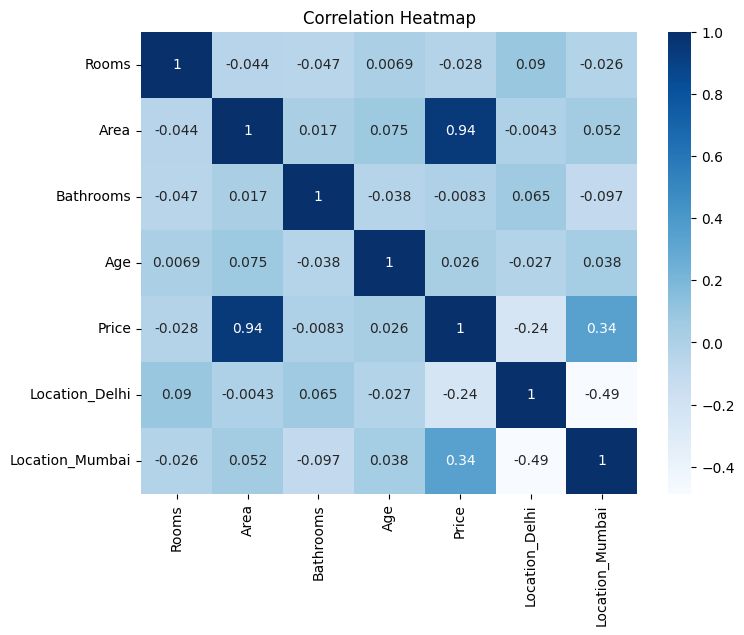

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

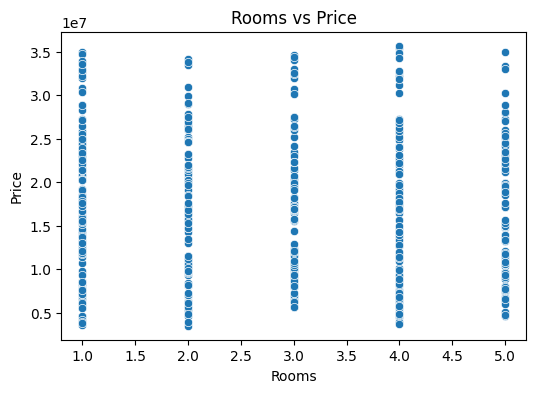

In [8]:
# Scatter plot: Rooms vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Rooms'], y=df['Price'])
plt.title("Rooms vs Price")
plt.show()

In [9]:
# Outlier Removal (IQR Method)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

In [10]:
# Feature & Target Split
X = df.drop("Price", axis=1)    # independent variables
y = df["Price"]                 # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predictions & Evaluation
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9750735893331475
MAE: 976903.1619694334


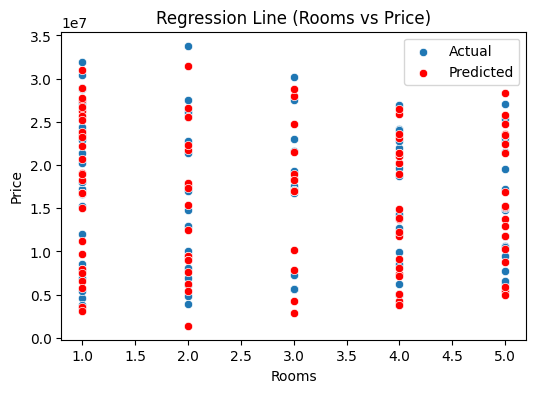

In [13]:
# Regression Line Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Rooms'], y=y_test, label="Actual")
sns.scatterplot(x=X_test['Rooms'], y=y_pred, color='red', label="Predicted")
plt.title("Regression Line (Rooms vs Price)")
plt.legend()
plt.show()